# Introducción

Una constelación de tres satélites orbitando alrededor de la Tierra forma un radiotelescopio por interferometria de muy larga base (VLBI) cuya dirección de observación puede ir cambiando a lo largo del tiempo. El objetivo del problema es observar un gran número de radiofuentes orientando dicha dirección convenientemente. La función objetivo es:

$$J = \sum P h (0.2 + \cos^2 \delta)$$

siendo:

* $P$ un parámetro de bonificación que aumenta si se observa repetidamente una radiofuente,
* $h$ la menor de las altitudes de los tres satélites y que debe cumplir $h \ge 10\,000.0~\text{km}$,
* $\delta$ la declinación de la radiofuente y
* $J$ tiene unidades de kilómetros.

Una observación se produce instantáneamente cuando el vector normal del plano formado por los tres satélites apunta en la dirección de la radiofuente con una precisión de $0.1~\text{deg}$. La expresión de la función objetivo indica que **se premian observaciones repetidas de radiofuentes de baja declinación**.

Algunas restricciones:

* Las observaciones deben estar espaciadas 15 días.
* A partir de tres repeticiones, el parámetro $P$ se hace cero. Esta restricción es lógica, puesto que de otra forma podría mantener el plano del radiotelescopio fijo y obtener una puntuación infinita.

<small>Hay más información sobre el parámetro $P$ en el apartado 5 y ejemplos prácticos en el 8.3.1.</small>

## Catálogo de radiofuentes

Cargamos el catálogo de radiofuentes para inspeccionar la distribución de declinaciones.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
catalogue_data = np.loadtxt("../data/gtoc8_radiosources.txt", comments="%")
catalogue = pd.DataFrame(catalogue_data[:, 1:], index=catalogue_data[:, 0],
                         columns=["RA (deg)", "DEC (deg)"])
catalogue.head()

,RA (deg),DEC (deg)
1,359.92065,-88.78955
2,356.91670,-80.27817
3,64.09616,-79.25290
4,118.90179,-80.08681
5,181.02500,-82.32760


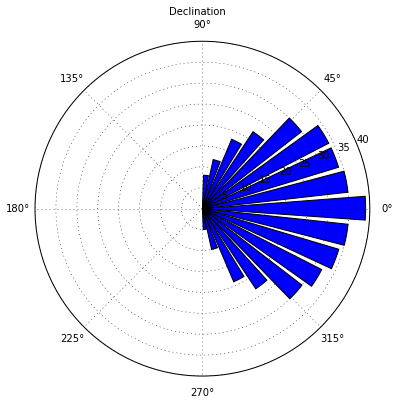

In [3]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
ax.hist(catalogue["DEC (deg)"].values * np.pi / 180, bins=17, rwidth=.8)
fig.suptitle("Declination")

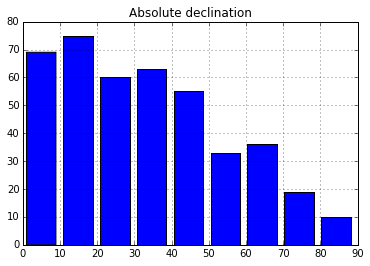

In [4]:
plt.figure()
catalogue["DEC (deg)"].abs().hist(bins=9, rwidth=.8).set_title("Absolute declination")

<div class="alert alert-warning">**Nota**: Este análisis de la declinación puede llevar a engaño. En realidad, si se pintan las radiofuentes se ve que tienen una distribución uniforme espacialmente.</div>

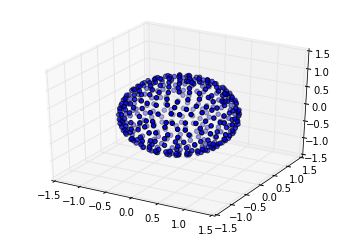

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ra = np.deg2rad(catalogue['RA (deg)'].values)
dec = np.deg2rad(catalogue['DEC (deg)'].values)
r = 1

xs = r * np.cos(ra) * np.cos(dec)
ys = r * np.sin(ra) * np.cos(dec)
zs = r * np.sin(dec)

ax.scatter(xs, ys, zs)

**Se comprueba que las radiofuentes están distribuidas de manera relativamente uniforme.**

## Observaciones: una estimación

Como primera idea, podemos pensar en observar las radiofuentes de menor declinación, tratando de repetir tres veces cada una para así maximizar la puntuación posible. Teniendo en cuenta que deben transcurrir 15 días entre observaciones, esto impondría una cota superior a la puntuación obtenible.

El número máximo de observaciones será:

In [6]:
max_ob = 365 * 3 // 15
max_ob

73

Estas serán las radiofuentes que den puntuación máxima:

In [7]:
catalogue["ABSDEC (deg)"] = catalogue["DEC (deg)"].abs()
candidate_sources = catalogue.sort("ABSDEC (deg)").iloc[:max_ob // 3]
candidate_sources

,RA (deg),DEC (deg),ABSDEC (deg)
200,110.41998,-0.00215,0.00215
198,87.88767,0.02431,0.02431
204,147.70357,-0.09558,0.09558
195,59.11799,0.12320,0.12320
194,48.79947,0.17478,0.17478
196,71.25030,-0.24357,0.24357
190,12.03614,0.31594,0.31594
419,74.10626,0.32759,0.32759
216,270.91743,0.38151,0.38151
189,0.27459,0.64583,0.64583


Y estas serán las más rápidamente accesibles al principio de la misión:

In [8]:
catalogue.sort("ABSDEC (deg)", ascending=False)[["RA (deg)", "DEC (deg)"]].head(n=10)

,RA (deg),DEC (deg)
412,1.94084,89.12247
1,359.92065,-88.78955
406,3.07354,82.38233
5,181.02500,-82.32760
413,5.49574,80.50522
2,356.91670,-80.27817
408,120.05237,80.17269
4,118.90179,-80.08681
411,301.37074,79.96597
3,64.09616,-79.25290


Ahora, suponiendo para cada una de las radiofuentes un factor $P = 6$ (es decir: tres observaciones lo suficientemente distintas), y una altura mínima de $h = 1\,000\,000.0~\text{km}$ en todos los casos, tenemos:

In [9]:
max_J = ((1 + 3 + 6) * 1000000 * (0.2 + np.cos(candidate_sources["DEC (deg)"].values))).sum()
max_J

202121587.88591698

Esta es una cota superior absoluta para la función objetivo. Nótese que en la práctica es **imposible**, pues los triángulos deben ser diferentes en cada observación y por tanto no puedo tener altura mínima igual a la máxima permitida en todos los casos.

Una estimación más razonable sería suponer que se observan las radiofuentes más ventajosas, pero con una altura mínima de $h = 10\,000~\text{km}$ cada vez, que es la mínima permitida.

In [10]:
max2_J = ((1 + 3 + 6) * 10000 * (0.2 + np.cos(candidate_sources["DEC (deg)"].values))).sum()
max2_J

2021215.8788591695

Por tanto, **una idea sería utilizar propulsión continua para ajustar el plano orbital y hacer coincidir una radiofuente con el vector normal cada quince días**. Las restricciones geométricas o de propulsante determinarán la factibilidad de este método.

## Gasto de combustible

Cada satélite tiene dos sistemas de propulsión: uno químico que solo puede ser utilizado una vez y otro de propulsión continua. El propulsante químico debe usarse primero, y visto que las asistencias gravitatorias con la Luna están permitidas, cabe pensar que podría emplearse para alcanzar la órbita lunar y así modificar sustancialmente la trayectoria del satélite en cuestión.

La masa inicial de cada satélite es $4000~\text{kg}$ y la masa mínima admisible es $1890~\text{kg}$. Por tanto existe una limitación en el combustible que podemos gastar, y eso afectará a nuestra capacidad de maniobra.

La ecuación que rige la propulsión química es la ecuación de Tsiolkovsky:

$$\Delta v = I_{sp} g_0 \ln{\frac{m_0}{m_f}}$$

siendo

* $\Delta v$ el incremento de velocidad conseguido (limitado a $3~\text{km/s}$ para la propulsión química en este problema),
* $I_{sp}$ el [impulso específico](http://en.wikipedia.org/wiki/Specific_impulse) (constante dada),
* $g_0 = 9.80665~\text{m/s2}$ la gravedad en la superficie de la Tierra, y
* $m_0$ y $m_f$ las masas al inicio y final de la fase propulsiva respectivamente.

Para el sistema de propulsión continua tenemos la ecuación general:

$$F_{\text{thrust}} = I_{sp} g_0 \dot{m}$$

siendo $\dot{m}$ el gasto de masa de propulsante por unidad de tiempo.

Si empleamos todo el combustible químico nada más empezar la misión, podemos calcular cuánta masa gastaremos, pues sabemos que la capacidad del sistema es de $\Delta v = 3~\text{km/s}$:

In [11]:
g0 = 9.80665  # m/s2
m0 = 4000  # kg
mmin = 1980  # kg

In [12]:
dm = m0 / np.exp(3e3 / (450 * g0))
dm

2026.8513959386191

Por tanto, la masa restante para el sistema de empuje continuo sería:

In [13]:
dm - mmin

46.851395938619135

Suponiendo empuje constante igual al máximo ($0.1~\text{N}$), tendríamos este tiempo total de utilización antes de agotar las reservas:

In [14]:
max_t = (dm - mmin) * (5000 * g0) / 0.1
max_t

22972762.099072963

In [15]:
max_t / 3600 / 24  # Días

265.88845022075185

Es decir, menos de un año de empuje total. Puesto que la misión dura tres años, habrá dosificar el combustible y su utilización, puesto que una vez que se acabe no podremos controlar el plano orbital y por tanto la dirección de apuntamiento.